In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/miguel.postigo/Desktop/carpeta/programacion/python/kaggle/Pokemon.csv")
#[]

In [2]:
df[df["Name"] == "Pikachu"]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
30,25,Pikachu,Electric,NaN,320,35,55,40,50,50,90,1,False


In [3]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [4]:
b = np.array(df.columns)
print('Columnas: \n{}\n'.format(b))

Columnas: 
['#' 'Name' 'Type 1' 'Type 2' 'Total' 'HP' 'Attack' 'Defense' 'Sp. Atk'
 'Sp. Def' 'Speed' 'Generation' 'Legendary']



In [5]:
b = np.array(df.columns)
b

array(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation',
       'Legendary'], dtype=object)

### Update Aug 30 2016:
I just realized that Generation and Legendary variables were added to the dataset.
I'm going to add a step here to drop the variables so that the rest of the code works as it did originally.
Apologies to anyone who forked the notebook and had trouble following along!

In [6]:
df = df.drop(['Generation', 'Legendary'],1)

In [7]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


### Plots with Seaborn
To start things off, let's just make a 
- *scatterplot*

based on two variables from the data set.
I'll use HP and Attack in this example, but feel free to do something different!

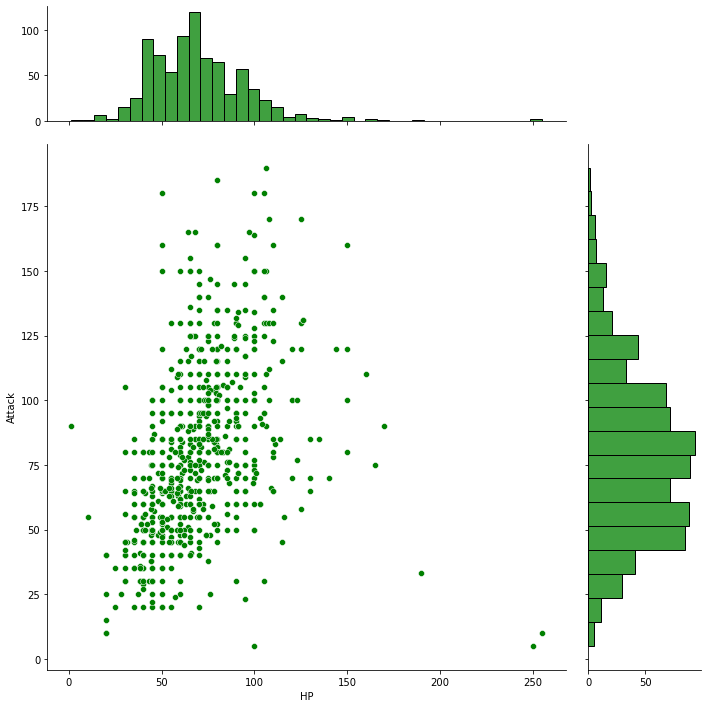

In [8]:
sns.jointplot(x="HP",
              y="Attack",
              data=df,
              kind="scatter",
              color = "Green",
              height = 10,
              ratio = 4,
              space = 0.2,
              dropna = False,
              #{x,y}lim = [100,100]
              marginal_ticks = True,
              #hue = "Type 1"
              
             );

### let's see if we can make something a little bit prettier. 
### How about a distribution of all six stats? We could even group it further using Pokémon type!

For starters, let's see if we can make a basic 
box and whisker plot 
of a single variable.

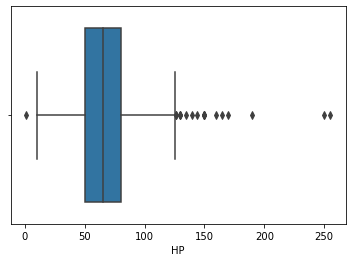

In [9]:
sns.boxplot(x="HP",
            #y="Attack",
            data=df);

Now let's see if we can get all of the stats in there.

As it turns out, if you don't specify an x or y argument, Seaborn will give you a plot for each numeric variable. Handy!

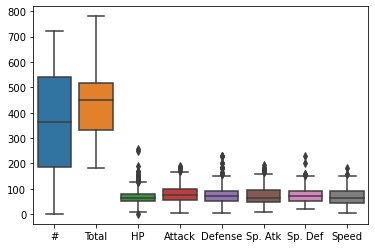

In [10]:
sns.boxplot(data=df);

Since the # variable doesn't make sense here, let's drop it from the table.
Total can be dropped as well, since we didn't originally want to include it and it's on a much larger scale.

In [11]:
df = df.drop(["Total","#"],1)

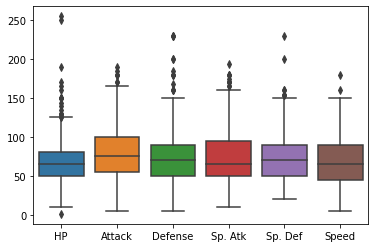

In [12]:
sns.boxplot(data=df);

### Alright, now all that's left is to include Pokémon type in this visualization.
One way to do this would be switch the graph to a 
swarmplot 
and color code the points by type.

Trying to use the swarmplot function with the "hue" argument is going to give us some errors if we don't transform our data a bit though. The Seaborn website provides an example using Pandas' melt function, so we'll give that a try!

In [13]:
df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,60,62,63,80,80,60
2,Venusaur,Grass,Poison,80,82,83,100,100,80
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80
4,Charmander,Fire,NaN,39,52,43,60,50,65


In [14]:
df = pd.melt(df,
             id_vars=["Name", "Type 1", "Type 2"],
             var_name="Stat")
df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,VenusaurMega Venusaur,Grass,Poison,HP,80
4,Charmander,Fire,NaN,HP,39


The head method doesn't really do this transformation justice, but our dataset now has 4800 rows up from 800!
So let's go ahead and run this plot function!

C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categori

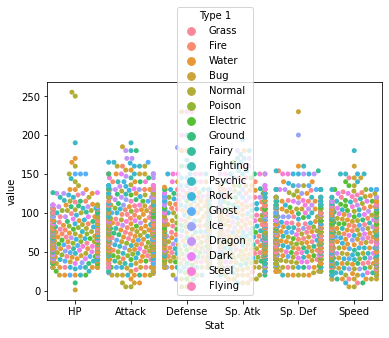

In [15]:
sns.swarmplot(x="Stat", 
              y="value", 
              data=df, 
              hue="Type 1");

I think we've got some cleaning up to do

Using a few Seaborn and Matplotlib functions, we can adjust how our plot looks.
On each line below, we will:

- Make the plot larger
- Adjust the y-axis
- Organize the point distribution by type and make the individual points larger
- Move the legend out of the way

C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 39.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categori

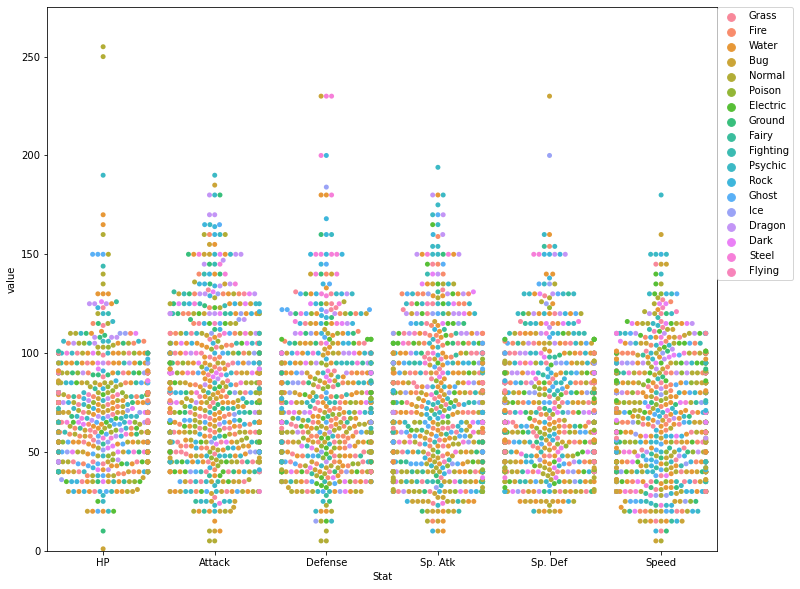

In [16]:
plt.figure(figsize=(12,10))

plt.ylim(0, 275)

sns.swarmplot(x="Stat", 
              y="value", 
              data=df, 
              hue="Type 1", 
              #split=True, 
              #size=7
             )

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);



For our final touch, we'll change the background to white and create a custom color palette that corresponds to each Pokémon type.
We'll use the Seaborn color_palette function and a with statement to accomplish this.

C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:2989: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 77.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 80.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.7% of the points cannot b

C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 76.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\miguel.postigo\Anaconda3\lib\site-packages\seaborn\categori

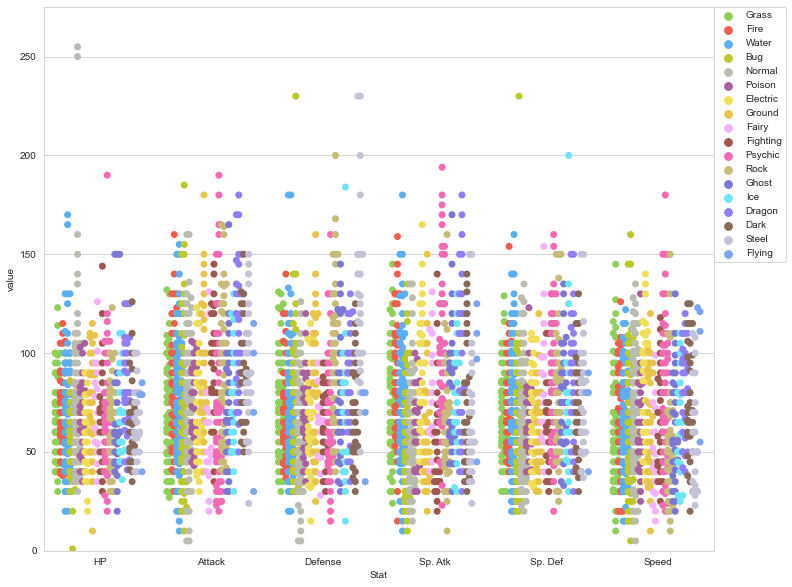

In [18]:
sns.set_style("whitegrid")
with sns.color_palette([
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9):
    plt.figure(figsize=(12,10))
    plt.ylim(0, 275)
    sns.swarmplot(x="Stat", y="value", data=df, hue="Type 1", split=True, size=7)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);